In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
data = pd.read_csv('D:\\Data Science\\Assignment\\Assignment 18\\CocaCola_Sales_Rawdata.csv')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [37]:
data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


<Axes: >

<Figure size 1200x600 with 0 Axes>

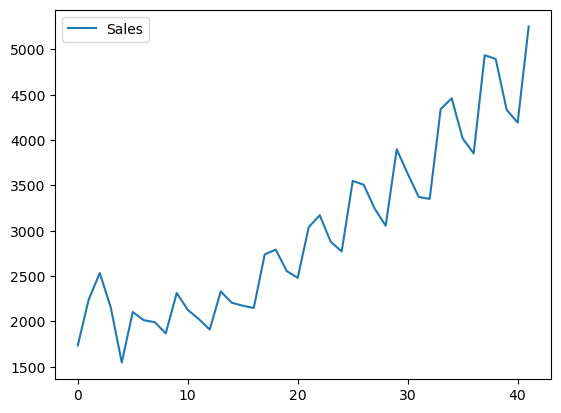

In [38]:
plt.figure(figsize=(12,6))
data.plot()

<Figure size 1000x400 with 0 Axes>

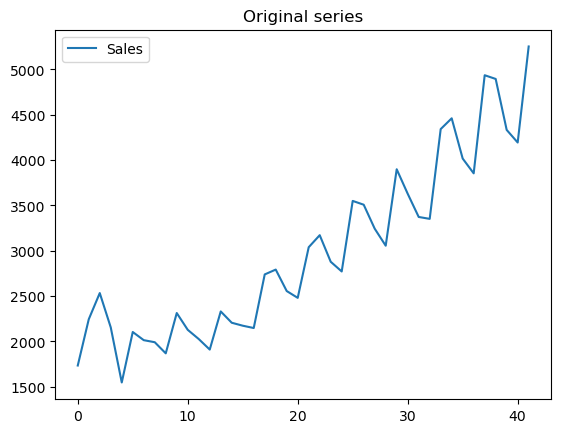

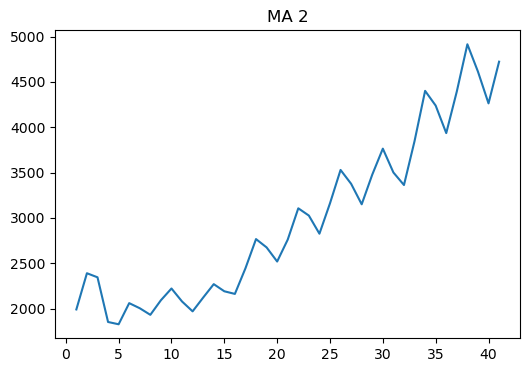

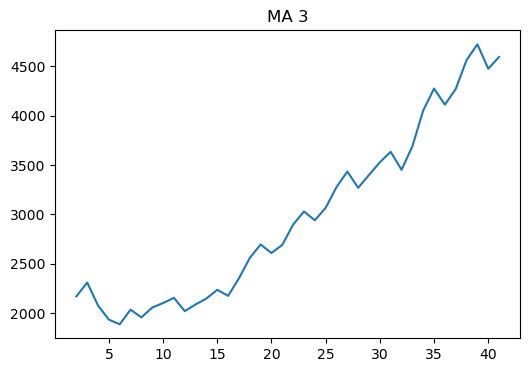

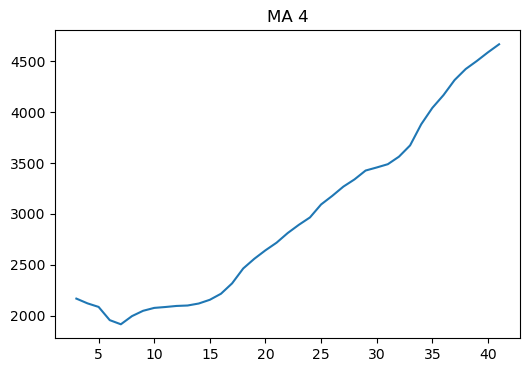

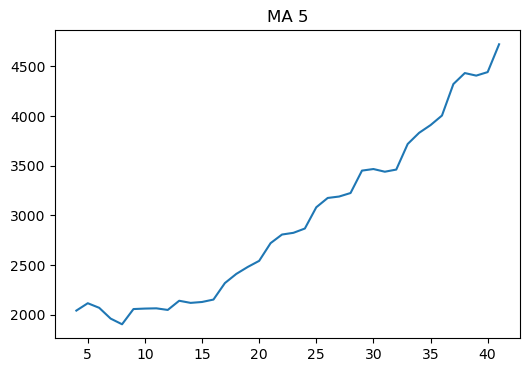

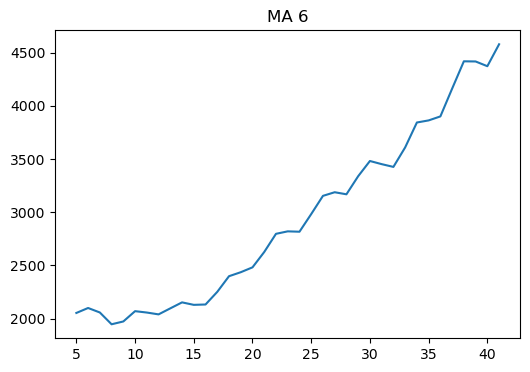

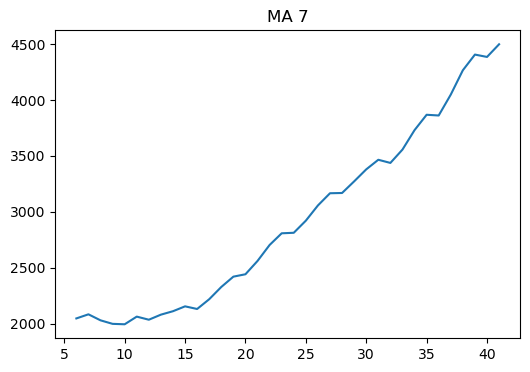

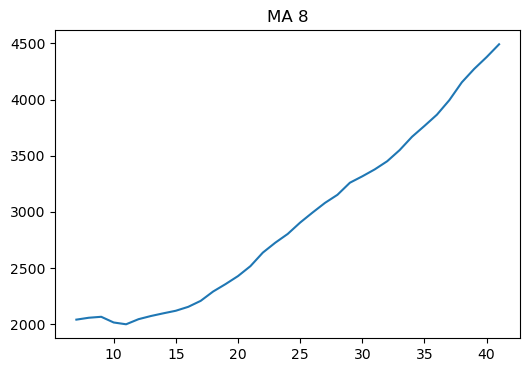

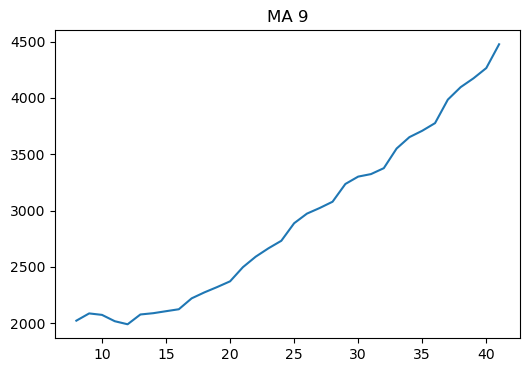

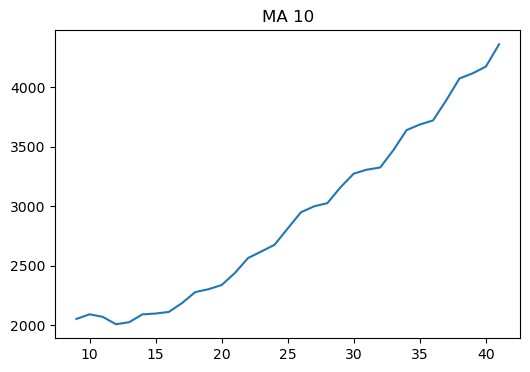

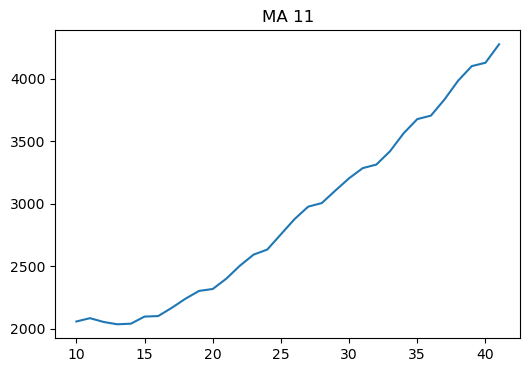

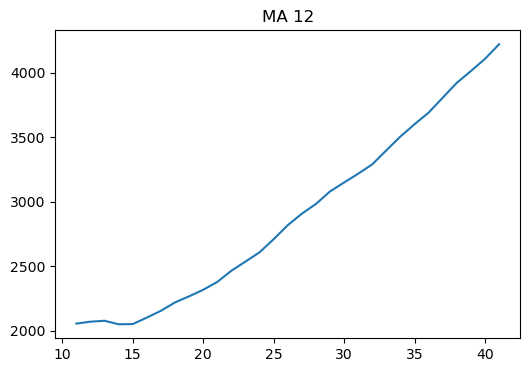

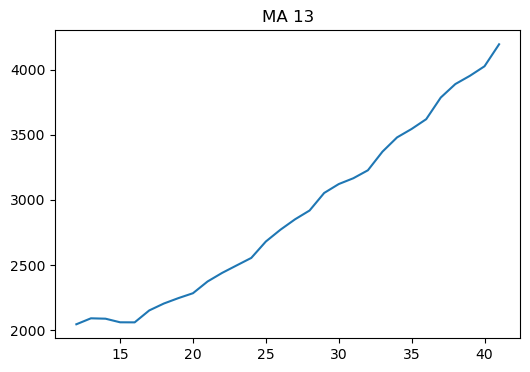

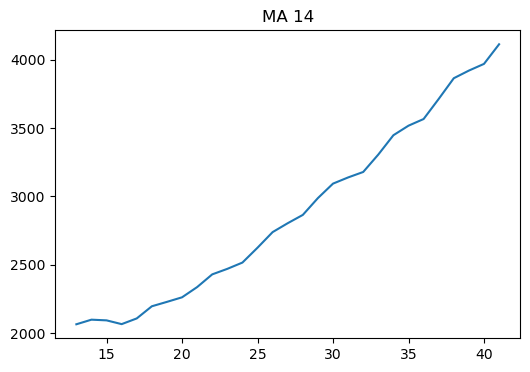

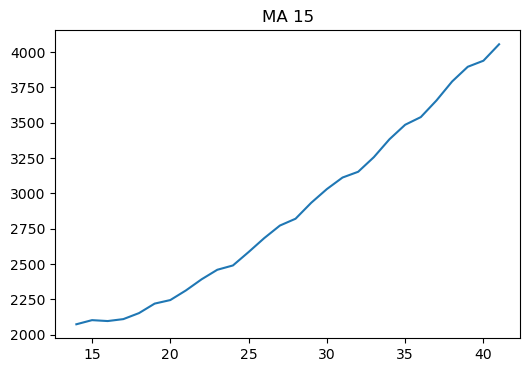

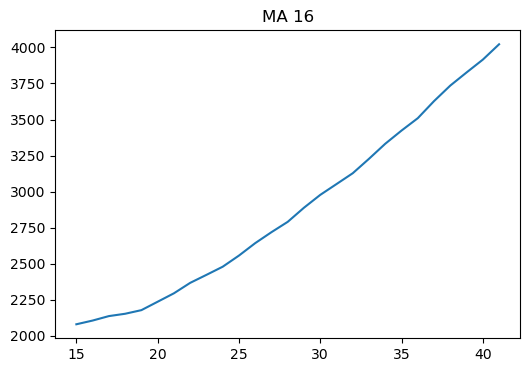

In [39]:
plt.figure(figsize=(10,4))
data.plot()
plt.title("Original series")

for i in range(2,17):
    plt.figure(figsize=(6,4))

    data["Sales"].rolling(i).mean().plot()
    plt.title("MA "+str(i))
    plt.show()

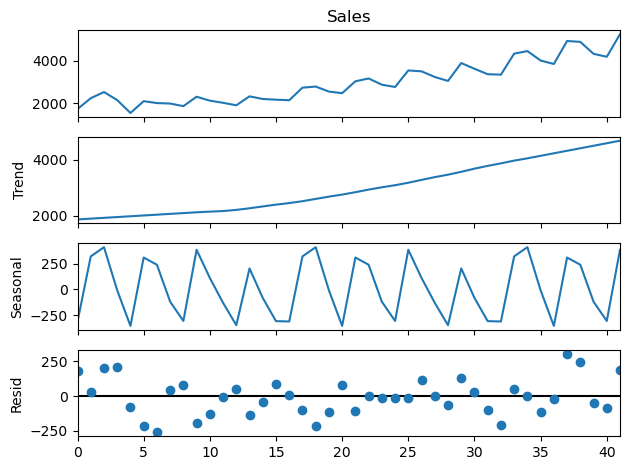

In [40]:
sed = seasonal_decompose(data['Sales'],period=16,two_sided=True,extrapolate_trend=1)
sed.plot()
plt.show()

In [41]:
def MAPE(org,pred):
    temp =np.abs((pred-org)/org)*100
    return np.mean(temp)

In [42]:
data.shape

(42, 2)

In [43]:
Train = data.head(34) 
Test = data.tail(8)

In [48]:
ses_model = SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

27.303724538990892

In [46]:
x = np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train['Sales']).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
    score = MAPE(pred_ses,Test.Sales)
    print("Smoothing Level: ",i, "MAPE Error: ",score)


Smoothing Level:  0.1 MAPE Error:  41.8613887209462
Smoothing Level:  0.1473684210526316 MAPE Error:  32.72504100506468
Smoothing Level:  0.19473684210526315 MAPE Error:  27.72284797991448
Smoothing Level:  0.24210526315789474 MAPE Error:  24.551803878548704
Smoothing Level:  0.2894736842105263 MAPE Error:  22.291255399418777
Smoothing Level:  0.33684210526315794 MAPE Error:  20.515185981711305
Smoothing Level:  0.38421052631578945 MAPE Error:  19.007893461900636
Smoothing Level:  0.43157894736842106 MAPE Error:  17.653035083170117
Smoothing Level:  0.4789473684210527 MAPE Error:  16.425992636869715
Smoothing Level:  0.5263157894736842 MAPE Error:  15.467496316972376
Smoothing Level:  0.5736842105263158 MAPE Error:  14.528786691189747
Smoothing Level:  0.6210526315789474 MAPE Error:  13.599306188184768
Smoothing Level:  0.6684210526315789 MAPE Error:  12.72666806813492
Smoothing Level:  0.7157894736842105 MAPE Error:  12.064725427486508
Smoothing Level:  0.7631578947368421 MAPE Error: 

In [50]:
hw_model = Holt(Train['Sales']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

9.29373485320541

In [51]:
alphas=np.arange(0.1,1,0.1)
betas=np.arange(0.1,1,0.1)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

        score=MAPE(pred_hw,Test.Sales)
        print("Smoothing Level ",i," Smoothing Slope ",j,"MAPE Error ",score)
        l.append((i,j,score))

Smoothing Level  0.1  Smoothing Slope  0.1 MAPE Error  19.049681094730122
Smoothing Level  0.1  Smoothing Slope  0.2 MAPE Error  28.330578167683036
Smoothing Level  0.1  Smoothing Slope  0.30000000000000004 MAPE Error  9.074364510258585
Smoothing Level  0.1  Smoothing Slope  0.4 MAPE Error  10.3067970922239
Smoothing Level  0.1  Smoothing Slope  0.5 MAPE Error  8.477128442582249
Smoothing Level  0.1  Smoothing Slope  0.6 MAPE Error  8.85725470227673
Smoothing Level  0.1  Smoothing Slope  0.7000000000000001 MAPE Error  14.977839566242405
Smoothing Level  0.1  Smoothing Slope  0.8 MAPE Error  25.02595768208043
Smoothing Level  0.1  Smoothing Slope  0.9 MAPE Error  28.5556544149305
Smoothing Level  0.2  Smoothing Slope  0.1 MAPE Error  11.083374372529256
Smoothing Level  0.2  Smoothing Slope  0.2 MAPE Error  9.074581853702108
Smoothing Level  0.2  Smoothing Slope  0.30000000000000004 MAPE Error  9.09711650992286
Smoothing Level  0.2  Smoothing Slope  0.4 MAPE Error  10.551491401777115
Smo

In [52]:
hw_dataframes = pd.DataFrame(l,columns=["smoothing Level","smoothing Slope","score"])
hw_dataframes.sort_values(['score'])

,smoothing Level,smoothing Slope,score
63,0.8,0.1,8.313809
55,0.7,0.2,8.354345
47,0.6,0.3,8.431150
4,0.1,0.5,8.477128
54,0.7,0.1,8.531395
...,...,...,...
70,0.8,0.8,31.484751
78,0.9,0.7,32.794206
71,0.8,0.9,35.049970
79,0.9,0.8,36.486622


In [55]:
hwe_model = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=8).fit() 
pred_hwe = hwe_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe,Test.Sales)

5.40696806052758

In [56]:
hwe_model_final = ExponentialSmoothing(data["Sales"],seasonal="add",trend="add",seasonal_periods=8).fit() 
hwe_model_final.forecast(10)


42    5257.123138
43    5018.360744
44    4834.521548
45    5565.325417
46    5520.833749
47    5323.531785
48    5284.080807
49    6056.083723
50    6136.295986
51    5897.533592
dtype: float64